In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [23]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [61]:
btc = pd.DataFrame(yf.download("BTC-USD",period="1d",start="2019-01-01",end="2024-05-21"))
btc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990
2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836
2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219
2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467
2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824
...,...,...,...,...,...,...
2024-05-16,66256.11,66712.43,64613.05,65231.58,65231.58,31573077994
2024-05-17,65231.30,67459.46,65119.32,67051.88,67051.88,28031279310
2024-05-18,67066.21,67387.33,66663.50,66940.80,66940.80,16712277406


<Axes: xlabel='Date'>

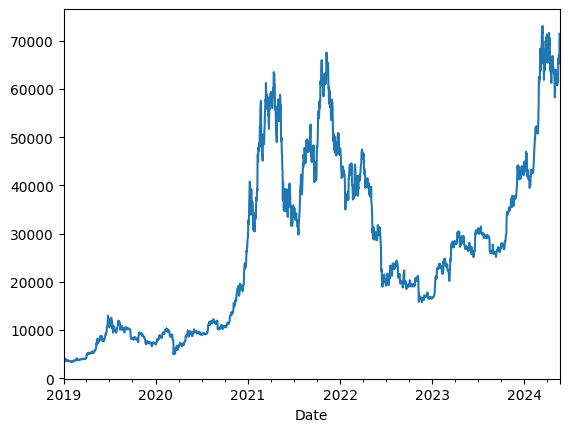

In [3]:
btc['Close'].plot(kind='line')

In [62]:
btc['pct_change'] = btc['Close'].pct_change()
btc.head(2)

,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN
2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03


In [63]:
btc['down'] = np.where(btc['pct_change'] < 0 ,1,0)
btc.head(5)

,Open,High,Low,Close,Adj Close,Volume,pct_change,down
Date,,,,,,,,
2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0
2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0
2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1
2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0
2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1


In [17]:
(btc['down'] != btc['down'].shift(1)).head(10) #determine if actual is different than the previous one, False means days today and yesterday have been loss days

Date
2019-01-01     True
2019-01-02    False
2019-01-03     True
2019-01-04     True
2019-01-05     True
2019-01-06     True
2019-01-07     True
2019-01-08     True
2019-01-09    False
2019-01-10     True
Name: down, dtype: bool

In [18]:
((btc['down'] != btc['down'].shift(1)).cumsum()).head(10) #si el numero aumenta, ha habido un candle change

Date
2019-01-01    1
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
2019-01-08    7
2019-01-09    7
2019-01-10    8
Name: down, dtype: int64

In [64]:
btc['candle_change'] = (btc['down'] != btc['down'].shift(1)).cumsum()
btc['consecutive_count'] = btc.groupby('candle_change').cumcount()+1 #cuentas cuanta ocurrencias consecutivas ha habido del candle change
btc['consecutive_count'] = np.where(btc['down']==1,-btc['consecutive_count'],btc['consecutive_count']) #fix for red candles
btc = btc.reset_index()
btc.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0,1,1
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0,1,2
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1,2,-1
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0,3,1
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1,4,-1


In [65]:
#for 3 days with loss 
btc['buy_signal'] = (btc['down'] == 1) & (btc['consecutive_count']==-3)
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count,buy_signal
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0,1,1,False
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0,1,2,False
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1,2,-1,False
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0,3,1,False
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1,4,-1,False


In [15]:
btc['buy_signal'].shift().replace(False,np.nan).ffill()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1962    True
1963    True
1964    True
1965    True
1966    True
Name: buy_signal, Length: 1967, dtype: object

In [66]:
btc['holding_position'] = btc['buy_signal'].shift().replace(False,np.nan).ffill()
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count,buy_signal,holding_position
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0,1,1,False,NaN
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0,1,2,False,NaN
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1,2,-1,False,NaN
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0,3,1,False,NaN
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1,4,-1,False,NaN


In [67]:
btc['Sell_Signal_Long'] = btc['holding_position'] & (btc['down'] == 1)
btc['Buy_Price'] = np.where(btc['buy_signal'], btc['Close'], np.nan)
btc['Sell_Price'] = np.where(btc['Sell_Signal_Long'], btc['Close'], np.nan)
btc['Buy_Price'] = btc['Buy_Price'].ffill() 

In [68]:
btc['buy_return'] = np.where(btc['Sell_Signal_Long'], btc['Sell_Price'] /btc['Buy_Price'] - 1, 0)
#hasta aca check para longing after nth dayts, para este caso fue 3 loss days

In [50]:
btc.to_csv("Pruebas.csv",index=False,sep=',')

In [31]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count,buy_signal,holding_position,Sell_Signal_Long,Buy_Price,Sell_Price,buy_return,investment_value
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0,1,1,False,NaN,False,NaN,NaN,0.00,10000.00
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0,1,2,False,NaN,False,NaN,NaN,0.00,10000.00
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1,2,-1,False,NaN,False,NaN,NaN,0.00,10000.00
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0,3,1,False,NaN,False,NaN,NaN,0.00,10000.00
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1,4,-1,False,NaN,False,NaN,NaN,0.00,10000.00


In [41]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count,buy_signal,holding_position,Sell_Signal_Long,Buy_Price,Sell_Price,buy_return,investment_value
0,2019-01-01,3746.71,3850.91,3707.23,3843.52,3843.52,4324200990,NaN,0,1,1,False,NaN,False,NaN,NaN,0.00,10000.00
1,2019-01-02,3849.22,3947.98,3817.41,3943.41,3943.41,5244856836,0.03,0,1,2,False,NaN,False,NaN,NaN,0.00,10000.00
2,2019-01-03,3931.05,3935.69,3826.22,3836.74,3836.74,4530215219,-0.03,1,2,-1,False,NaN,False,NaN,NaN,0.00,10000.00
3,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4847965467,0.01,0,3,1,False,NaN,False,NaN,NaN,0.00,10000.00
4,2019-01-05,3851.97,3904.90,3836.90,3845.19,3845.19,5137609824,-0.00,1,4,-1,False,NaN,False,NaN,NaN,0.00,10000.00


In [71]:
initial_investment = 10000
btc['investment_value'] = initial_investment
investment_value = initial_investment
invested = True #empieza invertido por estructura de df
for i in range(len(btc)):
    if btc['Sell_Signal_Long'].iloc[i]: #este if statement esta mal porque no esta acompañado de un flag que indique que tengo un long position
        if invested:
            print(f"dia: {btc['Date'].iloc[i]} - Investment value Pre: {btc['investment_value'].iloc[i]} - Return {btc['buy_return'].iloc[i]}")
            investment_value *= (1+btc['buy_return'].iloc[i])
            print("New investment value: ",investment_value)
            btc.loc[i:,'holding_position'] = False 
            btc.loc[i:,'investment_value'] = investment_value
            invested=False
            continue
    
    if not btc['holding_position'].iloc[i] and btc['buy_signal'].iloc[i]:
        btc.loc[i:,'investment_value'] = investment_value
        btc.loc[i:,'holding_position'] = True
        invested = True
            



    # btc['investment_value'].iloc[i] = investment_value  #maybe esta fallado el alocation aca tratar con .at como en gtp
    # btc.at[i,'investment_value'] = investment_value
    # print(f"Investment post {btc['investment_value'].iloc[i]}")

dia: 2019-01-31 00:00:00 - Investment value Pre: 10000 - Return 0.0028061058858905863
New investment value:  10028.061058858906
dia: 2019-05-20 00:00:00 - Investment value Pre: 10028.061058858906 - Return 0.09724671243884231
New investment value:  11003.25702896891
dia: 2019-05-28 00:00:00 - Investment value Pre: 11003.25702896891 - Return 0.13540189014072035
New investment value:  12493.118828395467
dia: 2019-06-01 00:00:00 - Investment value Pre: 12493.118828395467 - Return 0.029394164199672668
New investment value:  12860.343614603345
dia: 2019-07-04 00:00:00 - Investment value Pre: 12860.343614603345 - Return 0.05974626123337079
New investment value:  13628.701063752349
dia: 2019-07-24 00:00:00 - Investment value Pre: 13628.701063752349 - Return -0.00897322315406024
New investment value:  13506.407687807321
dia: 2019-08-17 00:00:00 - Investment value Pre: 13506.407687807321 - Return 0.017911394649442025
New investment value:  13748.326286199896
dia: 2019-08-24 00:00:00 - Investment

In [45]:
#btc[btc['buy_signal']==True] #2019-01-29
btc[(btc.Date>='2019-01-25') & (btc.Date<='2019-02-02')]

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,down,candle_change,consecutive_count,buy_signal,holding_position,Sell_Signal_Long,Buy_Price,Sell_Price,buy_return,investment_value
24,2019-01-25,3607.39,3612.93,3575.60,3599.77,3599.77,5265847539,-0.00,1,20,-1,False,NaN,False,NaN,NaN,0.00,10000.00
25,2019-01-26,3599.72,3654.93,3593.35,3602.46,3602.46,5098183235,0.00,0,21,1,False,NaN,False,NaN,NaN,0.00,10000.00
26,2019-01-27,3604.69,3612.67,3567.25,3583.97,3583.97,5570752966,-0.01,1,22,-1,False,NaN,False,NaN,NaN,0.00,10000.00
27,2019-01-28,3584.28,3586.75,3439.23,3470.45,3470.45,6908930483,-0.03,1,22,-2,False,NaN,False,NaN,NaN,0.00,10000.00
28,2019-01-29,3468.87,3476.07,3400.82,3448.12,3448.12,5897159493,-0.01,1,22,-3,True,NaN,False,3448.12,NaN,0.00,10000.00
29,2019-01-30,3443.90,3495.17,3429.39,3486.18,3486.18,5955112627,0.01,0,23,1,False,True,False,3448.12,NaN,0.00,10000.00
30,2019-01-31,3485.41,3504.80,3447.92,3457.79,3457.79,5831198271,-0.01,1,24,-1,False,True,True,3448.12,3457.79,0.00,10028.06
31,2019-02-01,3460.55,3501.95,3431.59,3487.95,3487.95,5422926707,0.01,0,25,1,False,True,False,3448.12,NaN,0.00,10028.06
32,2019-02-02,3484.63,3523.29,3467.57,3521.06,3521.06,5071623601,0.01,0,25,2,False,True,False,3448.12,NaN,0.00,10028.06


<Axes: >

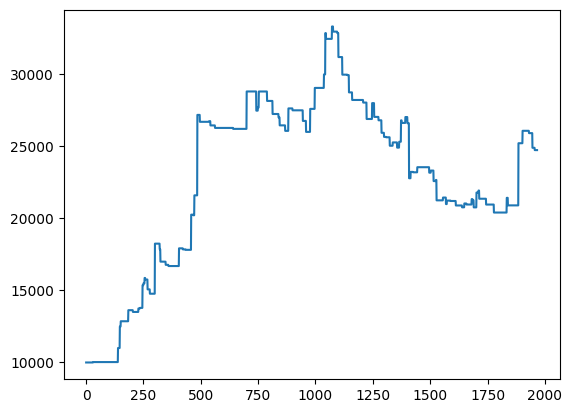

In [77]:
btc['investment_value'].plot()

In [78]:
btc.buy_signal.value_counts()

False    1860
True      107
Name: buy_signal, dtype: int64

# HOlding

In [82]:
hold_df = btc[['Date','Close','pct_change']].copy()
hold_df.head()

,Date,Close,pct_change
0,2019-01-01,3843.52,NaN
1,2019-01-02,3943.41,0.03
2,2019-01-03,3836.74,-0.03
3,2019-01-04,3857.72,0.01
4,2019-01-05,3845.19,-0.00


In [90]:
value = 10000
investment = [value]
for i in range(1,len(hold_df)):
    daily_return = investment[-1] * (1+hold_df['pct_change'].iloc[i])
    investment.append(daily_return)
hold_df['returns'] = investment

hold_df.tail()

,Date,Close,pct_change,returns
1962,2024-05-16,65231.58,-0.02,169718.34
1963,2024-05-17,67051.88,0.03,174454.34
1964,2024-05-18,66940.80,-0.00,174165.36
1965,2024-05-19,66278.37,-0.01,172441.84
1966,2024-05-20,71448.20,0.08,185892.61


# Holding vs 3 day Loss

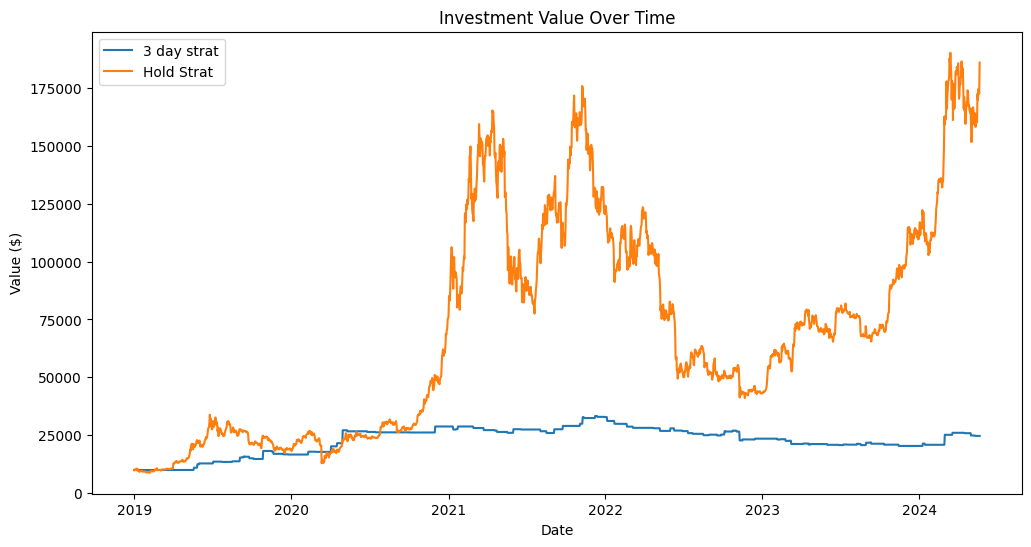

In [97]:
plot_df = pd.DataFrame({
    'Date': hold_df['Date'],
    'Strategy': btc['investment_value'],
    'Simple Returns': hold_df['returns']  # Assuming 'returns' is the column for simple returns
})

# Set the Date column as the index for plotting
plot_df.set_index('Date', inplace=True)

# Plot both curves
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['Strategy'], label='3 day strat')   
plt.plot(plot_df.index, plot_df['Simple Returns'], label='Hold Strat')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('Investment Value Over Time')
plt.legend()

# Display the plot
plt.show()

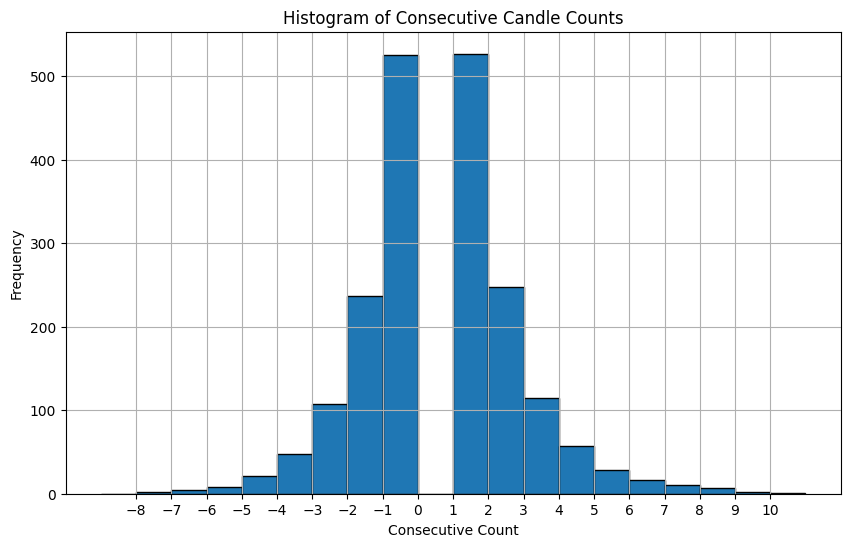

In [17]:
# Define the bins to align with integer values
bins = range(int(btc['consecutive_count'].min()) - 1, int(btc['consecutive_count'].max()) + 2)

# Plot the histogram
plt.figure(figsize=(10, 6))
btc['consecutive_count'].plot(kind='hist', bins=bins, edgecolor='black')

# Customize the x-axis ticks to show only integers
plt.xticks(range(int(btc['consecutive_count'].min()), int(btc['consecutive_count'].max()) + 1))

plt.xlabel('Consecutive Count')
plt.ylabel('Frequency')
plt.title('Histogram of Consecutive Candle Counts')
plt.grid(True)
plt.show()

<Axes: xlabel='consecutive_count'>

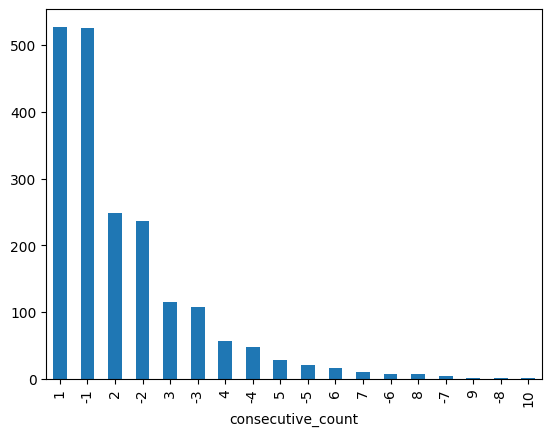

In [15]:
btc['consecutive_count'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

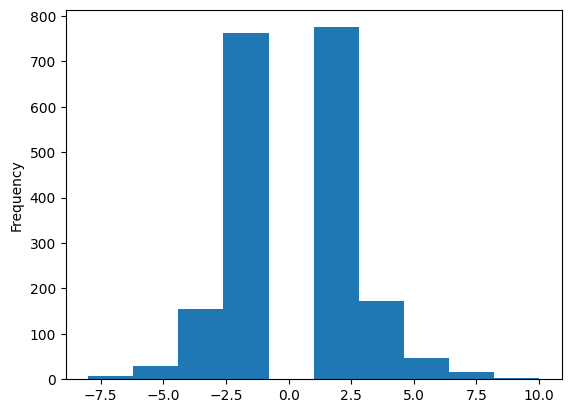

In [43]:
btc['consecutive_count'].plot(kind='hist')

In [6]:
up_days = len(btc[btc['down']==0])
up_days

170

In [65]:
((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 0)).sum() #parenthesis fucked up my boolean condition

46

In [38]:
down_up = ((btc['down'] == 1) & (btc['down'].shift(-1)==0)).sum()
down_up/len(btc[btc['down']==0])

0.5294117647058824

In [67]:
down_down_up = ((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 0)).sum()
down_down_up/len(btc[btc['down']==0])

0.27058823529411763

In [73]:
dddu = ((btc['down']==1) & (btc['down'].shift(-1) == 1) & (btc['down'].shift(-2) == 1) & (btc['down'].shift(-3) == 0)).sum()
dddu

25

In [38]:
pattern_series = ((btc['down'] == 1) & 
                  (btc['down'].shift(-1) == 1) & 
                  (btc['down'].shift(-2) == 1) & 
                  (btc['down'].shift(-3) == 1) & 
                  (btc['down'].shift(-4) == 1) & 
                  (btc['down'].shift(-5) == 0)).sum()

denom = ((btc['down'] == 1) & 
        (btc['down'].shift(-1) == 1) & 
        (btc['down'].shift(-2) == 1) & 
        (btc['down'].shift(-3) == 1) & 
        (btc['down'].shift(-4) == 1) ).sum() 


In [39]:
pattern_series,denom

(8, 17)

In [56]:
pattern = [1, 1, 0]
sequence_count = 0

# Convert the 'down' column to a list for processing
down_list = btc['down'].tolist()

# Check for the pattern in the list using a sliding window approach
for i in range(len(down_list) - 2):
    # Check if the slice from the list matches the pattern
    if down_list[i:i+3] == pattern:
        sequence_count += 1
sequence_count

46

# Backtesting

In [31]:
from backtesting import Backtest,Strategy


In [21]:
btc.down

Date
2022-01-01    0
2022-01-02    1
2022-01-03    1
2022-01-04    1
2022-01-05    1
             ..
2022-12-27    1
2022-12-28    1
2022-12-29    0
2022-12-30    1
2022-12-31    1
Name: down, Length: 365, dtype: int64

In [58]:
class BTCstrat(Strategy):
    def init(self):
        self.entry_signal = False
        pass

    def next(self):
        if len(self.data) < 6 :
            return #not enough data points

        if self.entry_signal:    
            if self.data.down[-1] == 1:
                print("Selling")
                self.position.close()
                self.sell()
                self.entry_signal = False 
    
        # Check the pattern of 5 down days followed by an up day
        if not self.position and not self.entry_signal:
            if (self.data.down[-6] == 1 and 
                self.data.down[-5] == 1 and 
                self.data.down[-4] == 1 and 
                self.data.down[-3] == 1 and 
                self.data.down[-2] == 1 and 
                self.data.down[-1] == 0):

                print("Longing")    
                # Enter long position
                self.position.close()
                self.buy()
                self.entry_signal = True 

In [62]:
bt = Backtest(btc,BTCstrat,cash=100000,commission=0.01)
stats = bt.run()

Longing
Selling


In [63]:
bt.plot()

/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/diegotorpoco/Documents/peopl/peoplvenv/lib/python3.9/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1653', ...)

In [64]:
print(stats)

Start                     2022-01-01 00:00:00
End                       2022-12-31 00:00:00
Duration                    364 days 00:00:00
Exposure Time [%]                   97.808219
Equity Final [$]                148930.145781
Equity Peak [$]                 150562.925078
Return [%]                          48.930146
Buy & Hold Return [%]              -65.299639
Return (Ann.) [%]                   48.930146
Volatility (Ann.) [%]               53.220801
Sharpe Ratio                          0.91938
Sortino Ratio                        2.196697
Calmar Ratio                         2.204958
Max. Drawdown [%]                   -22.19096
Avg. Drawdown [%]                   -4.799001
Max. Drawdown Duration      106 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                    2
Win Rate [%]                             50.0
Best Trade [%]                      59.895779
Worst Trade [%]                     -0.788967
Avg. Trade [%]                    